# Futures Price and Volume Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [2]:
import yfinance as yf
import re

In [3]:
# Download the platinum prices
futures_data = yf.download("GC=F", start="2021-01-01", end="2022-11-15", interval='1h') 
# continuous platinum futures with the symbol “PL=F”

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-01-03 18:00:00,1908.199951,1918.900024,1906.099976,1917.400024,1917.400024,11710
2021-01-03 19:00:00,1917.099976,1918.500000,1914.599976,1917.900024,1917.900024,4148
2021-01-03 20:00:00,1917.900024,1923.400024,1916.900024,1921.500000,1921.500000,12096
2021-01-03 21:00:00,1921.500000,1926.000000,1920.300049,1925.699951,1925.699951,6654
2021-01-03 22:00:00,1925.800049,1929.199951,1924.800049,1927.400024,1927.400024,5775


In [4]:
# GC=F gold
# SI=F silver
# PL=f platinum

# CL=F crude oil
# HO=F heating oil
# NG=F natural gas

# SB=F soybean 
# ZC=F corn
# ZO=F oat

In [5]:
# df_futures = pd.DataFrame(columns=['Symbol','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
intervals = ['1d', '1m', '1h']
commodity_futures = ['GC=F', 'SI=F', 'PL=F', 'CL=F', 'HO=F', 'NG=F', 'SB=F', 'ZC=F', 'ZO=F']
months = {'January': 'F',
          'February': 'G',
          'March': 'H',
          'April': 'J',
          'May': 'K',
          'June': 'M',
          'July': 'N',
          'August': 'Q',
          'September': 'U',
          'October': 'V',
          'November': 'X',
          'December': 'Z'}
downloaded = dict()

In [6]:
def get_future_symbol(symbol, start="2021-01-01", end="2022-11-15", interval='1h'):
    '''
    Get data for a symbol
    '''
    futures_data = yf.download(symbol, start=start, end=end, interval=interval) 
    futures_data.index = pd.to_datetime(futures_data.index)

    return futures_data

def generate_futures_symbols(symbol, maturities=None, years=[23, 24, 25, 26]):
    '''
    Generate futures symbols for an instrument 
    '''
    symbol = symbol.split('=')[0]
    res = []
    for yr in years:
        for key, val in months.items():
            res.append(symbol + val + str(yr) + '.CMX')

    return res

def download_futures(symbols, start="2021-01-01", end="2022-11-15", interval='1h'):
    '''
    Get data for several symbols & combine
    '''
    df_futures = pd.DataFrame(columns=['Symbol','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
#     downloaded = dict()
    
    for symbol in symbols:
        try:
            futures_data = yf.download(symbol, start=start, end=end, interval=interval) 
            if futures_data.empty:
                continue
            futures_data.index = pd.to_datetime(futures_data.index)
            futures_data = futures_data.reset_index()
            futures_data['Symbol'] = symbol
            df_futures = df_futures.append(futures_data, ignore_index=True)
            print('Downloaded: ', symbol)
            downloaded[symbol] = futures_data.shape[0]
        except:
            print('Unavailable: ', symbol)
    return df_futures

In [7]:
## Download the noted futures data for the project

# df_futures = download_futures(symbols=commodity_futures)
# df_futures = df_futures.set_index('index')

In [8]:
futures_data.shape[0]

10926

In [9]:
# Generate futures symbols for GC=F (Gold)
symb = generate_futures_symbols('GC=F')

In [10]:
print(symb) 

['GCF23.CMX', 'GCG23.CMX', 'GCH23.CMX', 'GCJ23.CMX', 'GCK23.CMX', 'GCM23.CMX', 'GCN23.CMX', 'GCQ23.CMX', 'GCU23.CMX', 'GCV23.CMX', 'GCX23.CMX', 'GCZ23.CMX', 'GCF24.CMX', 'GCG24.CMX', 'GCH24.CMX', 'GCJ24.CMX', 'GCK24.CMX', 'GCM24.CMX', 'GCN24.CMX', 'GCQ24.CMX', 'GCU24.CMX', 'GCV24.CMX', 'GCX24.CMX', 'GCZ24.CMX', 'GCF25.CMX', 'GCG25.CMX', 'GCH25.CMX', 'GCJ25.CMX', 'GCK25.CMX', 'GCM25.CMX', 'GCN25.CMX', 'GCQ25.CMX', 'GCU25.CMX', 'GCV25.CMX', 'GCX25.CMX', 'GCZ25.CMX', 'GCF26.CMX', 'GCG26.CMX', 'GCH26.CMX', 'GCJ26.CMX', 'GCK26.CMX', 'GCM26.CMX', 'GCN26.CMX', 'GCQ26.CMX', 'GCU26.CMX', 'GCV26.CMX', 'GCX26.CMX', 'GCZ26.CMX']


In [11]:
# yfinance changed something in the unavailable tickers on 11.20.22. Thus, manually picking only the available 
# ones from Yahoo.com
symb = ['GCF23.CMX', 'GCG23.CMX', 'GCJ23.CMX', 'GCM23.CMX', 'GCQ23.CMX',
        'GCV23.CMX', 'GCZ23.CMX', 'GCG24.CMX', 'GCJ24.CMX', 'GCM24.CMX',
        'GCZ24.CMX', 'GCM25.CMX', 'GCZ25.CMX', 'GCZ26.CMX']

In [12]:
# However it is important to note that the 1m data is only retrievable for the last 7 days, 
# and anything intraday (interval <1d) only for the last 60 days.

## Daily data

In [13]:
df_gold_daily = get_future_symbol('GC=F', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [14]:
df_gold_daily

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,1944.699951,154
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951,1952.699951,113
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024,1906.900024,331
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049,1912.300049,122
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976,1834.099976,60
...,...,...,...,...,...,...
2022-11-08,1703.199951,1712.099976,1703.199951,1712.099976,1712.099976,23
2022-11-09,1707.400024,1720.199951,1706.000000,1710.099976,1710.099976,497
2022-11-10,1708.199951,1750.300049,1708.199951,1750.300049,1750.300049,325


In [15]:
df_gold_futures_daily = download_futures(symb, interval='1d')

[*********************100%***********************]  1 of 1 completed
Downloaded:  GCF23.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCG23.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCJ23.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCM23.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCQ23.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCV23.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCZ23.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCG24.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCJ24.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCM24.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCZ24.CMX
[*********************100%***********************]  1 of 1 completed
Downloaded:  GCM25.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)
/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCZ25.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
Downloaded:  GCZ26.CMX


/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2059246060.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_futures = df_futures.append(futures_data, ignore_index=True)


In [16]:
df_gold_futures_daily

,Symbol,Open,High,Low,Close,Adj Close,Volume,Date
0,GCF23.CMX,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,2,2022-10-28
1,GCF23.CMX,1646.599976,1650.800049,1646.599976,1647.400024,1647.400024,2,2022-10-31
2,GCF23.CMX,1660.599976,1665.500000,1656.000000,1656.900024,1656.900024,99,2022-11-01
3,GCF23.CMX,1664.900024,1672.699951,1645.599976,1656.900024,1656.900024,38,2022-11-02
4,GCF23.CMX,1646.400024,1646.400024,1628.599976,1637.800049,1637.800049,15,2022-11-03
...,...,...,...,...,...,...,...,...
4894,GCZ26.CMX,1952.400024,1952.400024,1952.400024,1952.400024,1952.400024,0,2022-11-08
4895,GCZ26.CMX,1949.699951,1949.699951,1949.699951,1949.699951,1949.699951,0,2022-11-09
4896,GCZ26.CMX,1989.099976,1989.099976,1989.099976,1989.099976,1989.099976,0,2022-11-10
4897,GCZ26.CMX,2005.599976,2005.599976,2005.599976,2005.599976,2005.599976,0,2022-11-11


In [17]:
df_gold_futures_daily['Symbol'].unique()

array(['GCF23.CMX', 'GCG23.CMX', 'GCJ23.CMX', 'GCM23.CMX', 'GCQ23.CMX',
       'GCV23.CMX', 'GCZ23.CMX', 'GCG24.CMX', 'GCJ24.CMX', 'GCM24.CMX',
       'GCZ24.CMX', 'GCM25.CMX', 'GCZ25.CMX', 'GCZ26.CMX'], dtype=object)

In [18]:
downloaded

{'GCF23.CMX': 12,
 'GCG23.CMX': 412,
 'GCJ23.CMX': 371,
 'GCM23.CMX': 473,
 'GCQ23.CMX': 285,
 'GCV23.CMX': 243,
 'GCZ23.CMX': 471,
 'GCG24.CMX': 159,
 'GCJ24.CMX': 118,
 'GCM24.CMX': 471,
 'GCZ24.CMX': 471,
 'GCM25.CMX': 471,
 'GCZ25.CMX': 471,
 'GCZ26.CMX': 471}

In [19]:
df_gold_futures_daily = df_gold_futures_daily.set_index('Date')[['Symbol', 'Adj Close', 'Volume']]

In [20]:
def change_ticker(x):
    return re.findall(r'\d+', x)[0] + ''.join(x.split(re.findall(r'\d+', x)[0]))

# re.findall(r'\d+', 'GCF23.CMX')[0] + ''.join('GCF23.CMX'.split(re.findall(r'\d+', 'GCF23.CMX')[0]))

In [21]:
df_gold_futures_daily['Symbol'] = df_gold_futures_daily['Symbol'].apply(change_ticker)

In [22]:
df_gold_futures_daily = df_gold_futures_daily.sort_values('Symbol')

Symbol
23GCF.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCG.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCJ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCQ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCV.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCG.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCJ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
25GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
25GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
26GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Adj Close, dtype: object

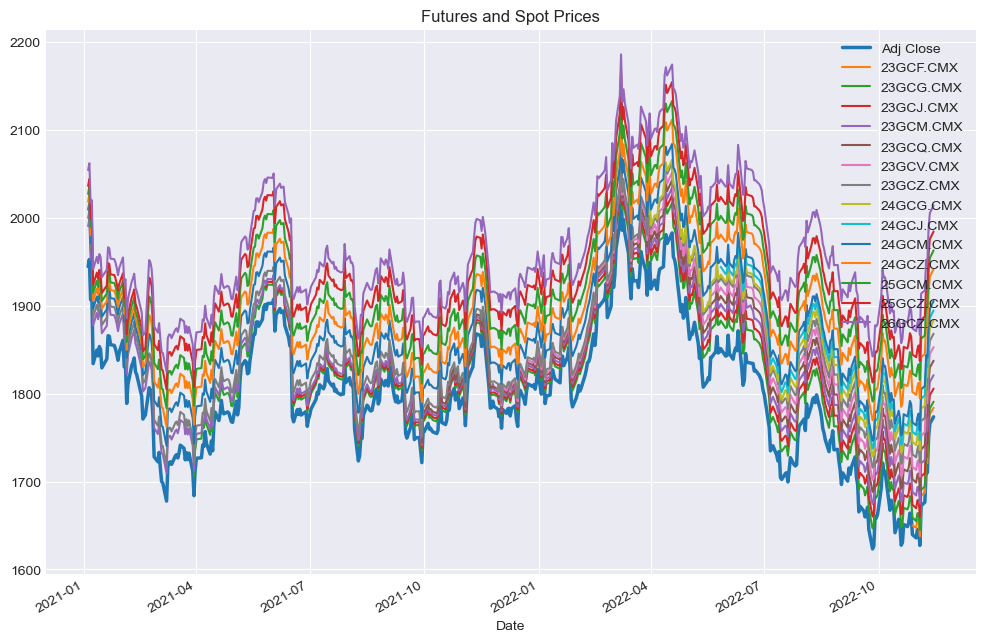

In [23]:
plt.title("Futures and Spot Prices")
df_gold_daily['Adj Close'].plot(legend=True, linewidth=2.5, figsize=(12,8))
df_gold_futures_daily.groupby('Symbol')['Adj Close'].plot(legend=True, figsize=(12,8))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

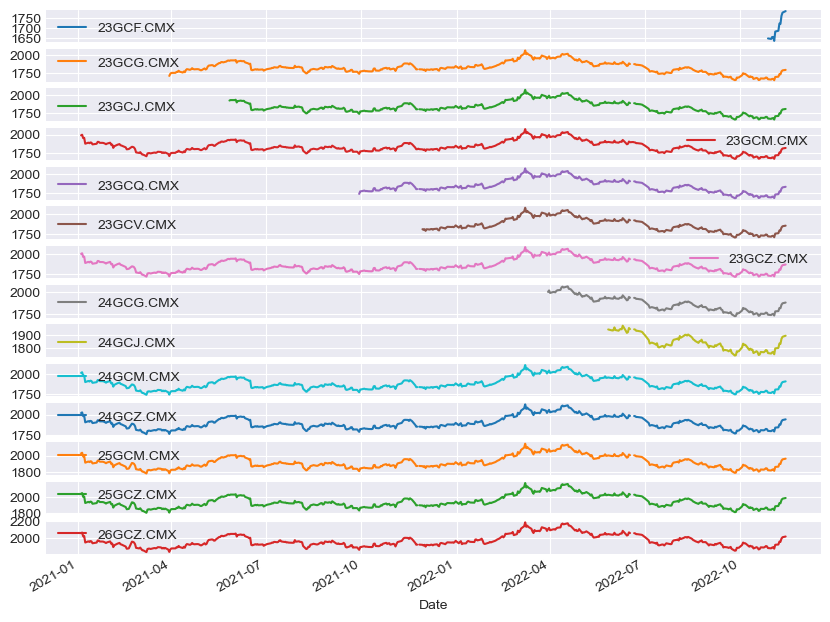

In [24]:
pd.pivot_table(df_gold_futures_daily.reset_index(),
               index='Date', columns='Symbol', values='Adj Close'
              ).plot(subplots=True, figsize=(10,8))

/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/1152165365.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_gold_futures_daily['2022'].groupby('Symbol')['Volume'].plot(legend=True, figsize=(12,8))


Symbol
23GCF.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCG.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCJ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCQ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCV.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
23GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCG.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCJ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
24GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
25GCM.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
25GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
26GCZ.CMX    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Volume, dtype: object

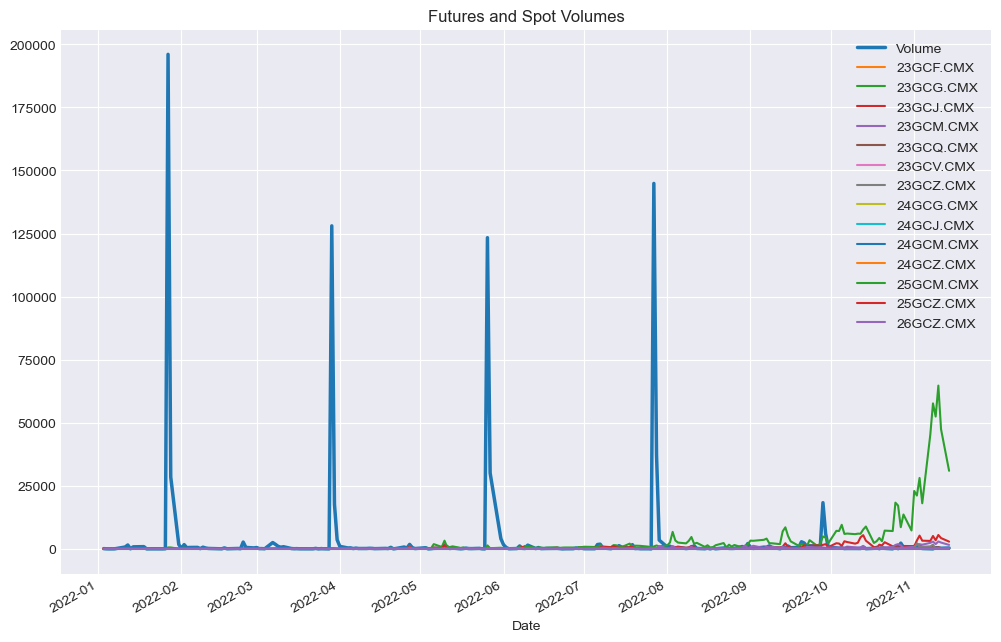

In [25]:
plt.title("Futures and Spot Volumes")
df_gold_daily.loc['2022','Volume'].plot(legend=True, linewidth=2.5, figsize=(12,8))
df_gold_futures_daily['2022'].groupby('Symbol')['Volume'].plot(legend=True, figsize=(12,8))

/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_14421/2178641972.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pd.pivot_table(df_gold_futures_daily['2022'].reset_index(),


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

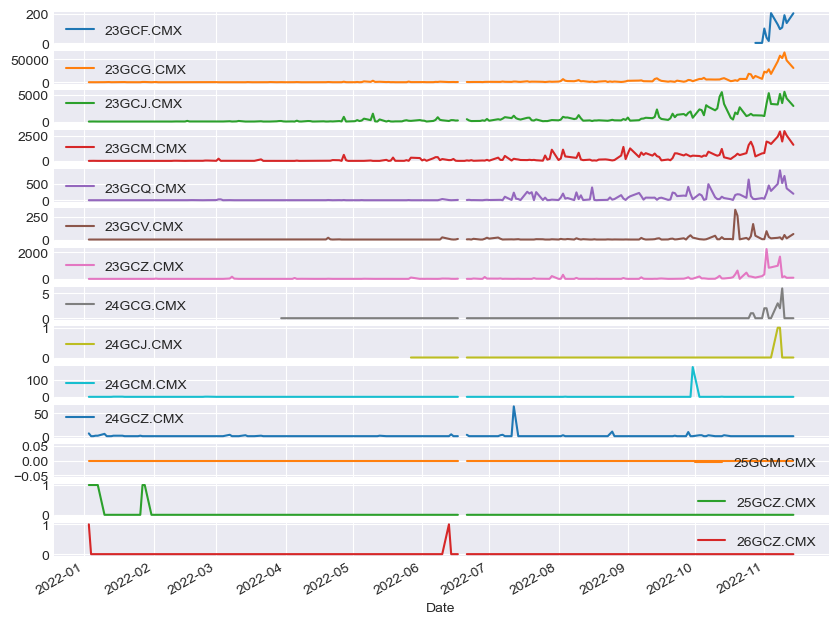

In [26]:
pd.pivot_table(df_gold_futures_daily['2022'].reset_index(),
               index='Date', columns='Symbol', values='Volume'
              ).plot(subplots=True, figsize=(10,8))

<AxesSubplot:xlabel='Date'>

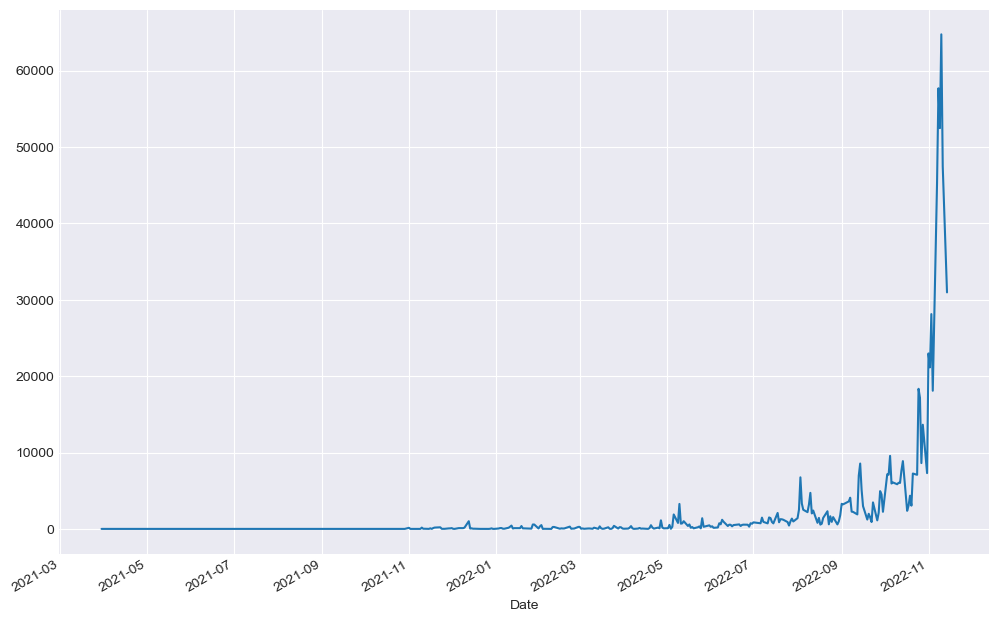

In [27]:
df_gold_futures_daily[df_gold_futures_daily['Symbol'] == '23GCG.CMX']['Volume'].plot(figsize=(12,8))

# Price Analysis

## `NMF`

In [28]:
# def sparsity_score(n, c, p):
#     '''
#     n: number of rows of the original matrix
#     c: number of components
#     p: number of columns of the original matrix
#     '''
#     return (c/p) + (c/n)

# def interpretability_score(sparsity_score, error):
#     '''
#     c: current number of components
#     c*: maximum allowable components
#     '''
#     return 0.5 * (sparsity_score(C)/sparsity_score(1) + error(C)/ error(c*))

In [29]:
import numpy as np
from sklearn.decomposition import NMF

In [30]:
df_gold_futures_daily

,Symbol,Adj Close,Volume
Date,,,
2022-10-28,23GCF.CMX,1650.000000,2
2022-11-14,23GCF.CMX,1784.000000,202
2022-11-10,23GCF.CMX,1761.000000,189
2022-11-09,23GCF.CMX,1721.000000,106
2022-11-08,23GCF.CMX,1723.099976,95
...,...,...,...
2021-08-09,26GCZ.CMX,1862.400024,0
2021-08-06,26GCZ.CMX,1899.099976,0
2021-08-05,26GCZ.CMX,1944.199951,0


In [31]:
downloaded

{'GCF23.CMX': 12,
 'GCG23.CMX': 412,
 'GCJ23.CMX': 371,
 'GCM23.CMX': 473,
 'GCQ23.CMX': 285,
 'GCV23.CMX': 243,
 'GCZ23.CMX': 471,
 'GCG24.CMX': 159,
 'GCJ24.CMX': 118,
 'GCM24.CMX': 471,
 'GCZ24.CMX': 471,
 'GCM25.CMX': 471,
 'GCZ25.CMX': 471,
 'GCZ26.CMX': 471}

In [32]:
# drop '23GCF.CMX', compared to others it has significantly less data
df_gold_futures_daily = df_gold_futures_daily[df_gold_futures_daily['Symbol'] != '23GCF.CMX']

In [33]:
df_nmf_daily = pd.pivot_table(df_gold_futures_daily.reset_index(), 
                              index='Date', columns='Symbol', values='Adj Close')

In [34]:
df_nmf_daily

Symbol,23GCG.CMX,23GCJ.CMX,23GCM.CMX,23GCQ.CMX,23GCV.CMX,23GCZ.CMX,24GCG.CMX,24GCJ.CMX,24GCM.CMX,24GCZ.CMX,25GCM.CMX,25GCZ.CMX,26GCZ.CMX
Date,,,,,,,,,,,,,
2021-01-04,NaN,NaN,1990.599976,NaN,NaN,1999.900024,NaN,NaN,2009.400024,2018.500000,2027.300049,2036.400024,2054.399902
2021-01-05,NaN,NaN,1998.400024,NaN,NaN,2007.699951,NaN,NaN,2017.199951,2026.300049,2035.099976,2044.199951,2062.199951
2021-01-06,NaN,NaN,1952.699951,NaN,NaN,1962.000000,NaN,NaN,1971.500000,1980.599976,1989.400024,1998.500000,2016.500000
2021-01-07,NaN,NaN,1956.300049,NaN,NaN,1965.599976,NaN,NaN,1975.099976,1984.199951,1993.000000,2002.099976,2020.099976
2021-01-08,NaN,NaN,1877.699951,NaN,NaN,1887.000000,NaN,NaN,1896.500000,1905.599976,1914.400024,1923.500000,1941.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,1730.000000,1744.900024,1760.000000,1776.300049,1791.500000,1807.300049,1821.400024,1832.900024,1843.599976,1880.000000,1901.199951,1922.699951,1952.400024
2022-11-09,1727.800049,1742.800049,1757.800049,1774.099976,1789.300049,1804.300049,1818.699951,1830.199951,1840.900024,1877.300049,1898.500000,1920.000000,1949.699951
2022-11-10,1767.800049,1782.699951,1797.699951,1813.400024,1828.800049,1843.699951,1858.099976,1869.599976,1880.300049,1916.699951,1937.900024,1959.400024,1989.099976


In [35]:
model = NMF(n_components=3, init='random', beta_loss='frobenius', random_state=0)
W = model.fit_transform(df_nmf_daily.fillna(0).values)
H = model.components_

In [36]:
# W @ H[:,0]

In [37]:
# W @ H[:,3]

In [38]:
# pd.DataFrame(W @ H)

In [39]:
pd.DataFrame(W)

,0,1,2
0,0.000000,47.616210,0.000000
1,0.000000,47.800085,0.000000
2,0.000000,46.722764,0.000000
3,0.000000,46.807629,0.000000
4,0.000000,44.954731,0.000000
...,...,...,...
468,15.740269,14.345110,37.620728
469,15.730155,14.313203,37.564654
470,16.126418,14.553526,38.367964
471,16.276534,14.663742,38.707299


In [40]:
# better for sparse data init = 'nndsvd'
model_sparse = NMF(n_components=3, init='nndsvd', beta_loss='frobenius', random_state=0) 
W_sparse = model_sparse.fit_transform(df_nmf_daily.fillna(0).values)
H_sparse = model_sparse.components_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [41]:
# pd.DataFrame(W_sparse @ H_sparse)

In [42]:
# model.reconstruction_err_

In [43]:
# model_sparse.reconstruction_err_

In [44]:
pd.DataFrame(W_sparse)

,0,1,2
0,14.513247,0.000000,0.147727
1,14.569293,0.000000,0.148287
2,14.240923,0.000000,0.145008
3,14.266790,0.000000,0.145266
4,13.702022,0.000000,0.139627
...,...,...,...
468,13.234772,6.500070,9.658582
469,13.215940,6.492744,9.644181
470,13.496922,6.642191,9.850372
471,13.612952,6.702267,9.937478


In [45]:
pd.DataFrame(H_sparse)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,77.966957,41.457321,127.262291,0.000000,0.000000,127.656765,0.000000,0.000000,129.010933,130.319998,131.614834,132.930667,134.309369
1,104.448305,181.346981,0.000000,228.554769,178.137082,0.673253,18.060730,0.000000,0.831341,0.757171,1.062719,1.366864,1.220688
2,1.347107,0.000000,10.300910,28.518112,68.205434,13.078813,192.402451,170.995514,13.907001,14.954919,15.128441,15.304808,16.399623


In [46]:
argmax = np.array(np.argpartition(pd.Series(W_sparse[:,0]).pct_change().apply(lambda x: abs(x)), -4)[-4:])
argmax

array([227, 370, 228,   0])

In [47]:
'2021-11-25 00:00:00'
'2022-06-21 00:00:00'
'2022-02-10 00:00:00'

'2022-02-10 00:00:00'

In [48]:
df_nmf_daily.iloc[227]

Symbol
23GCG.CMX       NaN
23GCJ.CMX       NaN
23GCM.CMX    1811.5
23GCQ.CMX       NaN
23GCV.CMX       NaN
23GCZ.CMX       NaN
24GCG.CMX       NaN
24GCJ.CMX       NaN
24GCM.CMX       NaN
24GCZ.CMX       NaN
25GCM.CMX       NaN
25GCZ.CMX       NaN
26GCZ.CMX       NaN
Name: 2021-11-25 00:00:00, dtype: float64

In [49]:
df_nmf_daily.iloc[228]

Symbol
23GCG.CMX    1798.800049
23GCJ.CMX    1801.500000
23GCM.CMX    1804.699951
23GCQ.CMX    1807.699951
23GCV.CMX            NaN
23GCZ.CMX    1814.000000
24GCG.CMX            NaN
24GCJ.CMX            NaN
24GCM.CMX    1835.500000
24GCZ.CMX    1853.500000
25GCM.CMX    1874.699951
25GCZ.CMX    1896.199951
26GCZ.CMX    1916.199951
Name: 2021-11-26 00:00:00, dtype: float64

In [50]:
df_nmf_daily.iloc[370]

Symbol
23GCG.CMX    1871.500000
23GCJ.CMX    1884.099976
23GCM.CMX    1896.500000
23GCQ.CMX    1908.500000
23GCV.CMX    1920.500000
23GCZ.CMX    1932.599976
24GCG.CMX    1936.400024
24GCJ.CMX    1945.400024
24GCM.CMX    1954.300049
24GCZ.CMX    1982.099976
25GCM.CMX    2003.300049
25GCZ.CMX    2024.800049
26GCZ.CMX    2054.500000
Name: 2022-06-21 00:00:00, dtype: float64

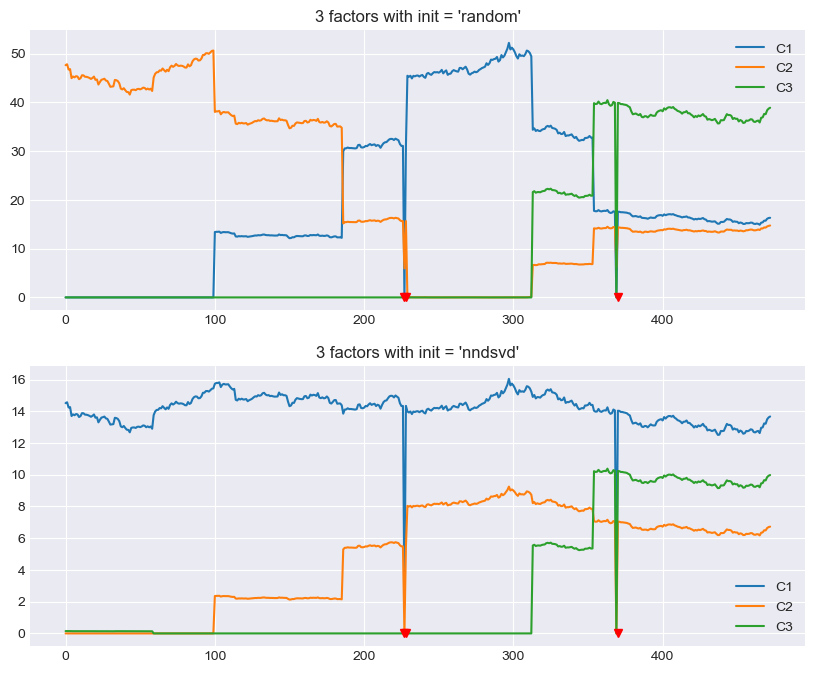

In [51]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("3 factors with init = 'random'")
plt.plot(W[:,0], label='C1')
plt.plot(W[:,1], label='C2')
plt.plot(W[:,2], label='C3')
plt.plot(argmax[0], 0, marker='v', color="red") # 227
plt.plot(argmax[1], 0, marker='v', color="red") # 370
plt.plot(argmax[2], 0, marker='v', color="red") # 280
plt.legend()

plt.subplot(2, 1, 2)

plt.title("3 factors with init = 'nndsvd'")
plt.plot(W_sparse[:,0], label='C1')
plt.plot(W_sparse[:,1], label='C2')
plt.plot(W_sparse[:,2], label='C3')
plt.plot(argmax[0], 0, marker='v', color="red") # 227
plt.plot(argmax[1], 0, marker='v', color="red") # 370
plt.plot(argmax[2], 0, marker='v', color="red") # 280
plt.legend()

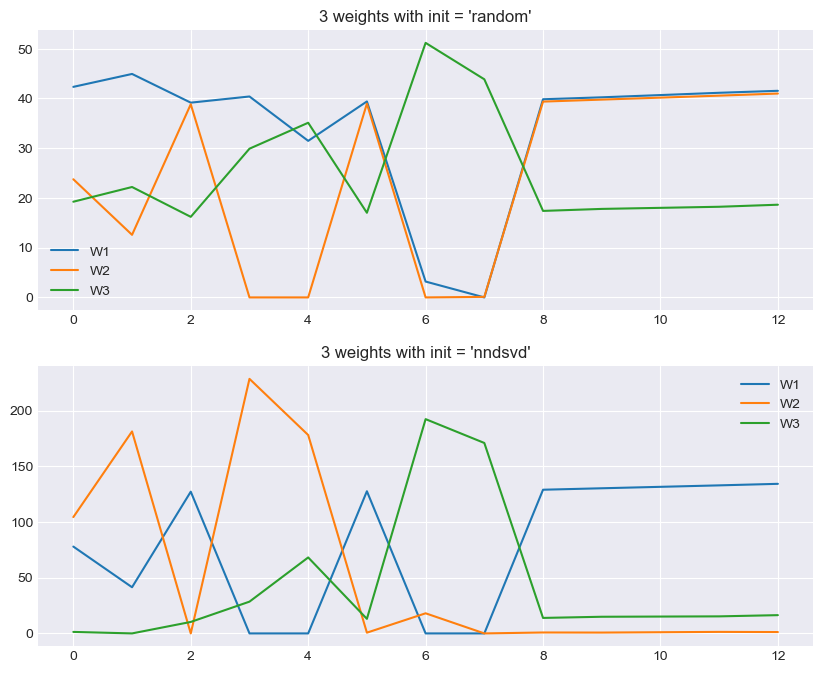

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("3 weights with init = 'random'")
plt.plot(H[0,:], label='W1')
plt.plot(H[1,:], label='W2')
plt.plot(H[2,:], label='W3')
plt.legend()

plt.subplot(2, 1, 2)

plt.title("3 weights with init = 'nndsvd'")
plt.plot(H_sparse[0,:], label='W1')
plt.plot(H_sparse[1,:], label='W2')
plt.plot(H_sparse[2,:], label='W3')
plt.legend()

## `PCA`

In [53]:
# # performing preprocessing part
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = df_nmf_daily.fillna(0).values
# X_train = sc.fit_transform(X_train)

In [54]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 3)
  
X_train = pca.fit_transform(df_nmf_daily.fillna(0).values)
# X_train = pca.fit_transform(X_train)
  
explained_variance = pca.explained_variance_ratio_

In [55]:
explained_variance

array([0.62416798, 0.1760669 , 0.08484691])

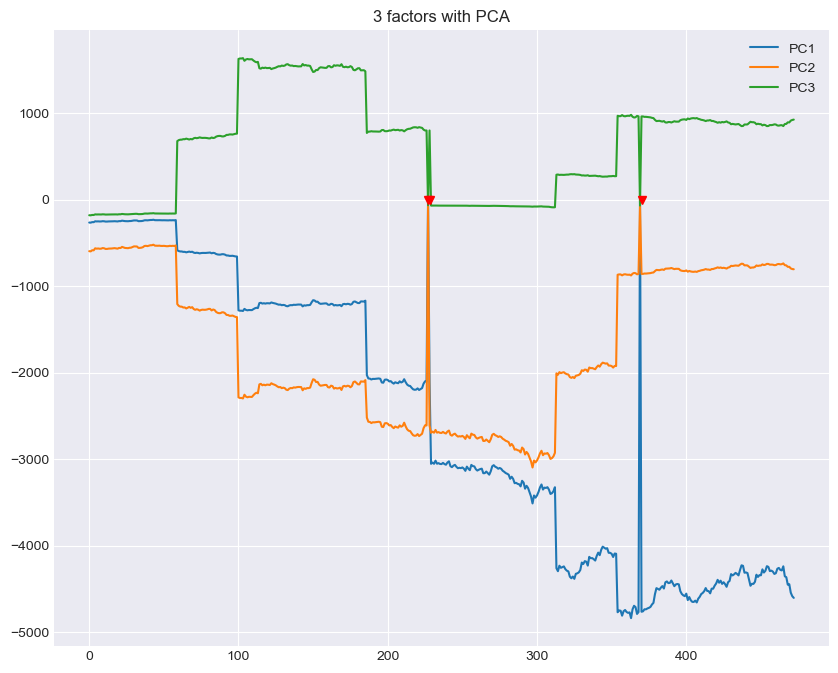

In [56]:
plt.figure(figsize=(10,8))
plt.title("3 factors with PCA")
plt.plot(pca.components_[0] @ df_nmf_daily.fillna(0).T.values, label='PC1')
plt.plot(pca.components_[1] @ df_nmf_daily.fillna(0).T.values, label='PC2')
plt.plot(pca.components_[2] @ df_nmf_daily.fillna(0).T.values, label='PC3')
plt.plot(argmax[0], 0, marker='v', color="red") # 227
plt.plot(argmax[1], 0, marker='v', color="red") # 370
plt.plot(argmax[2], 0, marker='v', color="red") # 280
plt.legend()

In [57]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.206542,-0.324863,-0.003399,-0.499058,-0.528376,-0.017143,-0.450209,-0.343739,-0.019052,-0.021079,-0.021925,-0.022772,-0.024639
1,-0.402305,-0.484750,-0.033709,-0.258529,-0.048193,-0.043933,0.473834,0.545010,-0.043397,-0.041989,-0.043493,-0.044999,-0.042705
2,0.488695,0.450854,-0.034910,-0.401575,-0.480274,-0.016368,0.187868,0.358964,-0.012980,-0.009439,-0.007312,-0.005182,-0.002978


In [58]:
# n_comp_sparse = df_nmf_daily.shape[0]
model_sparse_gold = NMF(n_components=1, init='nndsvd', random_state=0) # better for sparsness init
W_sparse_gold = model_sparse_gold.fit_transform(df_gold_daily['Adj Close'].fillna(0).values.reshape(-1,1))
H_sparse_gold = model_sparse_gold.components_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [59]:
W_sparse_gold.reshape(1,-1)[0]

array([ 9.82955273,  9.86998901,  9.6384917 ,  9.66578631,  9.27052135,
        9.34886664,  9.3150015 ,  9.36908477,  9.35240518,  9.24625996,
        9.29781596,  9.43125579,  9.4282232 ,  9.37969917,  9.37565592,
        9.3544265 ,  9.32511057,  9.28972883,  9.33724158,  9.40547779,
        9.25232515,  9.26091762,  9.04205665,  9.1532564 ,  9.25940163,
        9.27658717,  9.30337583,  9.22401988,  9.20733967,  9.08400891,
        8.95208569,  8.96371137,  8.97584237,  9.13202699,  9.12040193,
        9.07996566,  8.9687659 ,  8.73474071,  8.70643544,  8.76001338,
        8.67004304,  8.59371908,  8.58259935,  8.47999206,  8.67661357,
        8.70138091,  8.70542478,  8.69127184,  8.73878459,  8.74737705,
        8.72817019,  8.75546418,  8.80196627,  8.78377007,  8.71755517,
        8.75900272,  8.71856645,  8.75546418,  8.65386816,  8.51133054,
        8.66246124,  8.72665358,  8.72918085,  8.8024716 ,  8.79539512,
        8.87980622,  8.81157   ,  8.75040964,  8.82622766,  8.76

In [60]:
risk_free = get_future_symbol('^TNX')['Adj Close']

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

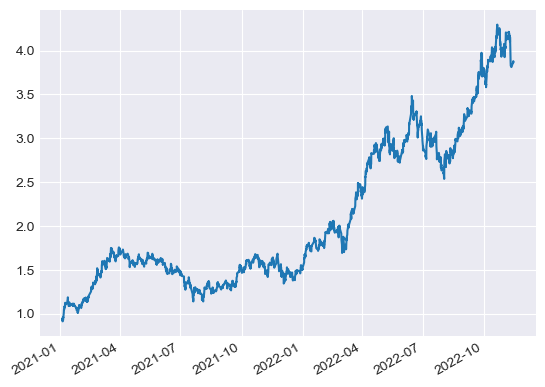

In [61]:
risk_free.plot()

<AxesSubplot:title={'center':'Risk Free Rate'}>

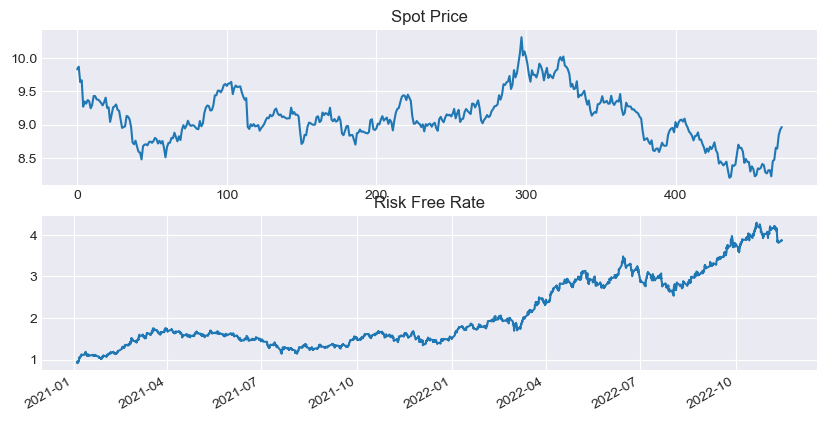

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
# plt.subplot(1, 2, 1)

plt.title("Spot Price")
pd.Series(W_sparse_gold.reshape(1,-1)[0]).plot()

plt.subplot(2, 1, 2)
# plt.subplot(1, 2, 2)

plt.title("Risk Free Rate")
risk_free.plot()

In [63]:
model.n_iter_

145

In [64]:
model.reconstruction_err_

19675.637608654717

In [65]:
model_sparse.n_iter_

200

In [66]:
model_sparse.reconstruction_err_

19674.042107896057

## `Nimfa`

In [67]:
import nimfa

In [68]:
nmf = nimfa.Nmf(df_nmf_daily.fillna(0).values, 
                seed="nndsvd", rank=3, max_iter=200, 
                n_run = 200,
                update='divergence', metric='fro',
                objective='fro', track_error=True)
nmf_fit = nmf()

In [69]:
icm_nmf = nimfa.Icm(df_nmf_daily.fillna(0).values, 
                seed="nndsvd", rank=3, max_iter=200, 
                n_run = 200,
                update='divergence',
                objective='fro', track_error=True)
icm_fit = icm_nmf()

In [70]:
W_nmf = nmf_fit.basis()
H_nmf = nmf_fit.coef()

In [71]:
W_icm = icm_fit.basis()
H_icm = icm_fit.coef()

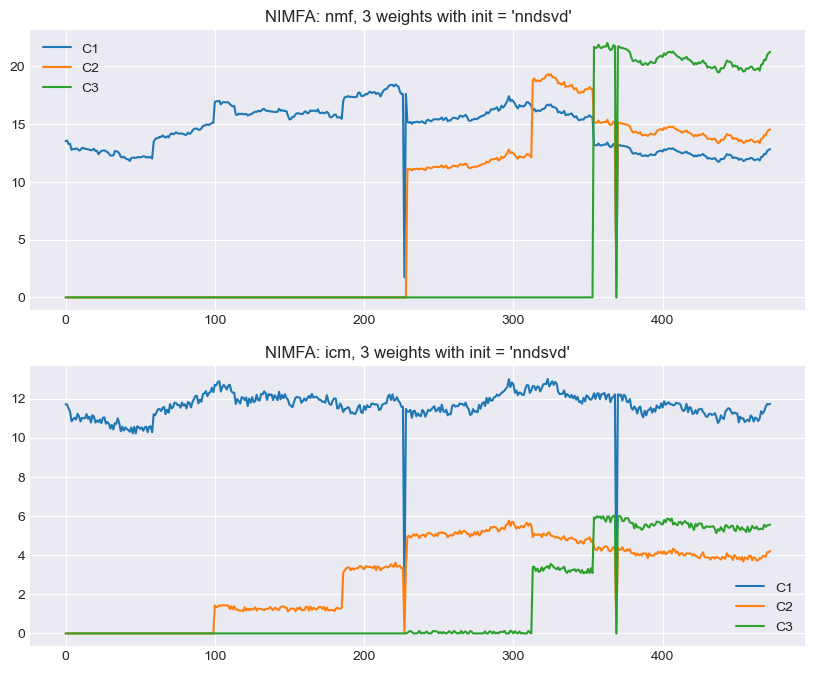

In [72]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("NIMFA: nmf, 3 weights with init = 'nndsvd'")
plt.plot(W_nmf[:,0], label='C1')
plt.plot(W_nmf[:,1], label='C2')
plt.plot(W_nmf[:,2], label='C3')
plt.legend()

plt.subplot(2, 1, 2)

plt.title("NIMFA: icm, 3 weights with init = 'nndsvd'")
plt.plot(W_icm[:,0], label='C1')
plt.plot(W_icm[:,1], label='C2')
plt.plot(W_icm[:,2], label='C3')
plt.legend()

In [73]:
print('NMF iterations: ', nmf_fit.fit.n_iter)
print('ICM iterations: ', icm_fit.fit.n_iter)

NMF iterations:  29
ICM iterations:  26


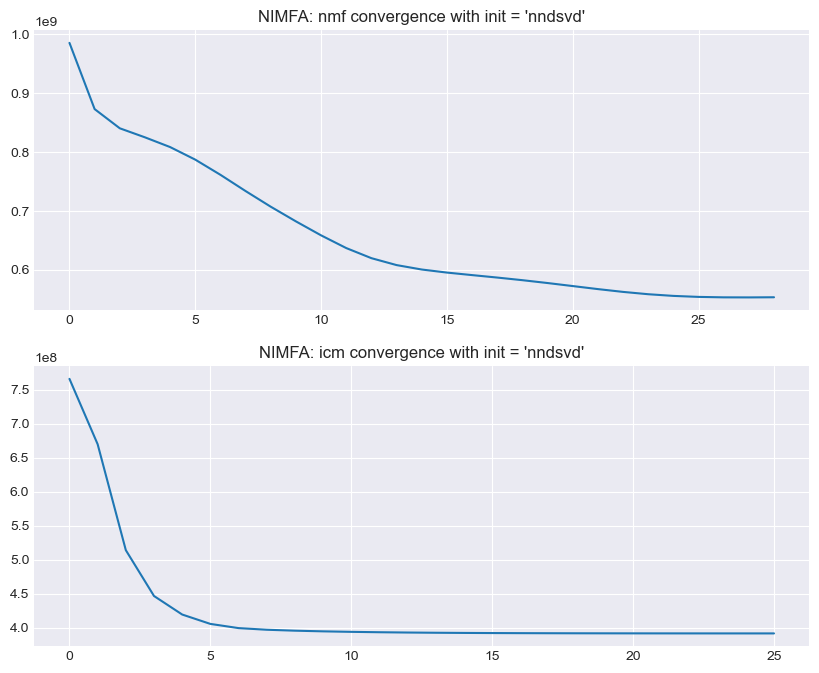

In [74]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.title("NIMFA: nmf convergence with init = 'nndsvd'")
plt.plot(nmf_fit.fit.tracker.get_error())


plt.subplot(2, 1, 2)
plt.title("NIMFA: icm convergence with init = 'nndsvd'")
plt.plot(icm_fit.fit.tracker.get_error())

# Volume Analysis

## `NMF`

In [75]:
df_nmf_daily_volume = pd.pivot_table(df_gold_futures_daily.reset_index(), 
                                     index='Date', columns='Symbol', values='Volume')

In [76]:
df_nmf_daily_volume

Symbol,23GCG.CMX,23GCJ.CMX,23GCM.CMX,23GCQ.CMX,23GCV.CMX,23GCZ.CMX,24GCG.CMX,24GCJ.CMX,24GCM.CMX,24GCZ.CMX,25GCM.CMX,25GCZ.CMX,26GCZ.CMX
Date,,,,,,,,,,,,,
2021-01-04,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2021-01-05,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2021-01-06,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2021-01-07,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2021-01-08,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,57679.0,5119.0,2899.0,897.0,24.0,1679.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-11-09,52461.0,3416.0,1912.0,514.0,1.0,117.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-10,64736.0,5518.0,2942.0,730.0,50.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
model = NMF(n_components=3, init='random', beta_loss='frobenius', max_iter=10000, random_state=0)
W = model.fit_transform(df_nmf_daily_volume.fillna(0).values)
H = model.components_

In [78]:
# better for sparse data init = 'nndsvd'
# max_inter = 10000 for convergence (have warning with small max_iter parameter)
model_sparse = NMF(n_components=3, init='nndsvd', beta_loss='frobenius', max_iter=10000, random_state=0) 
W_sparse = model_sparse.fit_transform(df_nmf_daily_volume.fillna(0).values)
H_sparse = model_sparse.components_

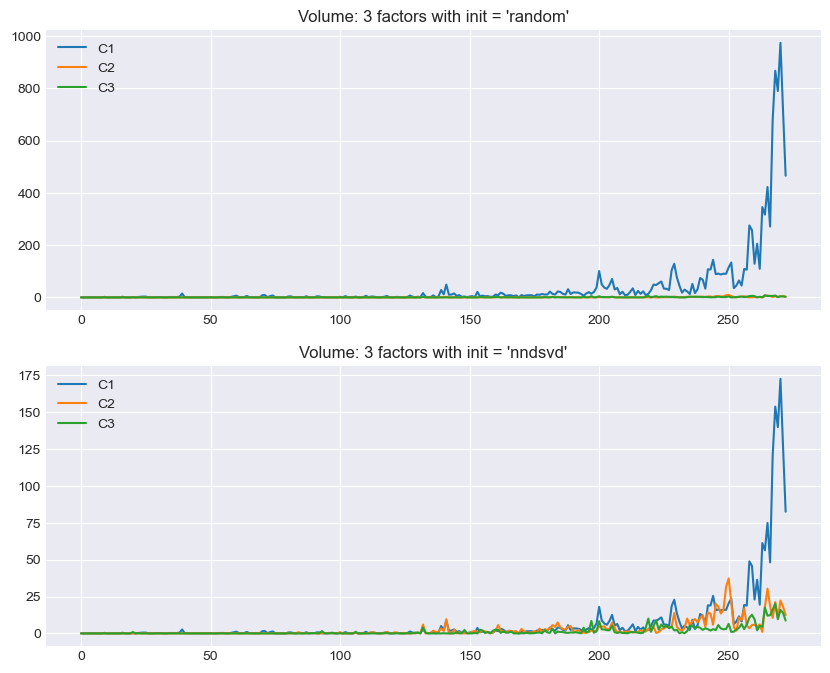

In [79]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("Volume: 3 factors with init = 'random'")
plt.plot(W[200:,0], label='C1')
plt.plot(W[200:,1], label='C2')
plt.plot(W[200:,2], label='C3')
plt.legend()

plt.subplot(2, 1, 2)

plt.title("Volume: 3 factors with init = 'nndsvd'")
plt.plot(W_sparse[200:,0], label='C1')
plt.plot(W_sparse[200:,1], label='C2')
plt.plot(W_sparse[200:,2], label='C3')
plt.legend()

## `PCA`

In [80]:
pca = PCA(n_components = 3)
  
X_train = pca.fit_transform(df_nmf_daily_volume.fillna(0).values)

  
explained_variance = pca.explained_variance_ratio_

In [81]:
explained_variance

array([9.93307798e-01, 5.59498835e-03, 6.92213927e-04])

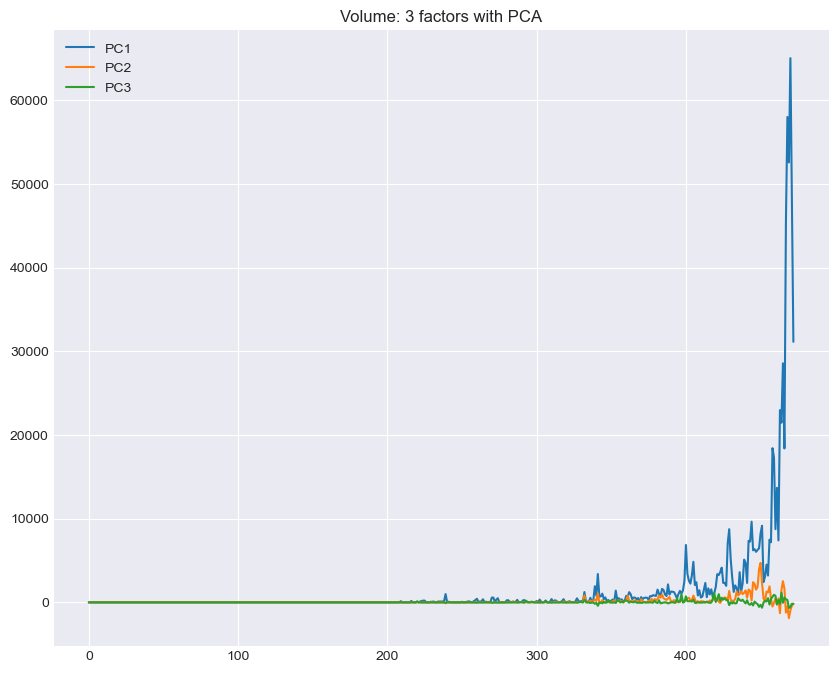

In [82]:
plt.figure(figsize=(10,8))
plt.title("Volume: 3 factors with PCA")
plt.plot(pca.components_[0] @ df_nmf_daily_volume.fillna(0).T.values, label='PC1')
plt.plot(pca.components_[1] @ df_nmf_daily_volume.fillna(0).T.values, label='PC2')
plt.plot(pca.components_[2] @ df_nmf_daily_volume.fillna(0).T.values, label='PC3')
plt.legend()

In [83]:
model.n_iter_

98

In [84]:
model.reconstruction_err_

2791.296100565579

In [85]:
model_sparse.n_iter_

1687

In [86]:
model_sparse.reconstruction_err_

2786.7182198168816

In [87]:
nmf_vol = nimfa.Nmf(df_nmf_daily_volume.fillna(0).values, 
                seed="nndsvd", rank=3, max_iter=200, 
                n_run = 200,
                update='divergence', metric='fro',
                objective='fro', track_error=True)
nmf_fit_vol = nmf_vol()

In [88]:
icm_nmf_vol = nimfa.Icm(df_nmf_daily_volume.fillna(0).values, 
                seed="nndsvd", rank=3, max_iter=200, 
                n_run = 200,
                update='divergence',
                objective='fro', track_error=True)
icm_fit_vol = icm_nmf_vol()

In [89]:
W_nmf = nmf_fit_vol.basis()
H_nmf = nmf_fit_vol.coef()

In [90]:
W_icm = icm_fit_vol.basis()
H_icm = icm_fit_vol.coef()

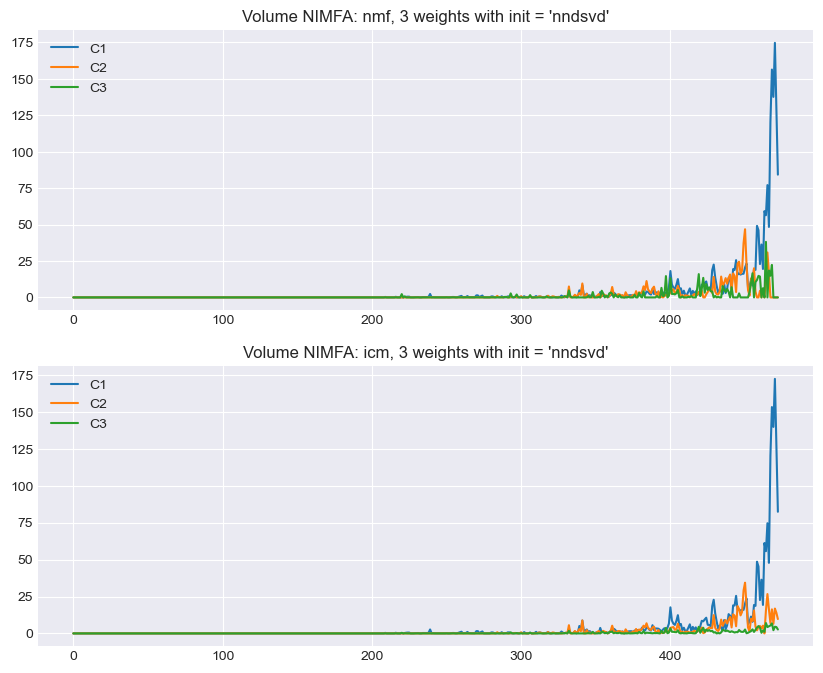

In [91]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("Volume NIMFA: nmf, 3 weights with init = 'nndsvd'")
plt.plot(W_nmf[:,0], label='C1')
plt.plot(W_nmf[:,1], label='C2')
plt.plot(W_nmf[:,2], label='C3')
plt.legend()

plt.subplot(2, 1, 2)

plt.title("Volume NIMFA: icm, 3 weights with init = 'nndsvd'")
plt.plot(W_icm[:,0], label='C1')
plt.plot(W_icm[:,1], label='C2')
plt.plot(W_icm[:,2], label='C3')
plt.legend()

In [92]:
print('NMF iterations: ', nmf_fit_vol.fit.n_iter)
print('ICM iterations: ', icm_fit_vol.fit.n_iter)

NMF iterations:  10
ICM iterations:  200


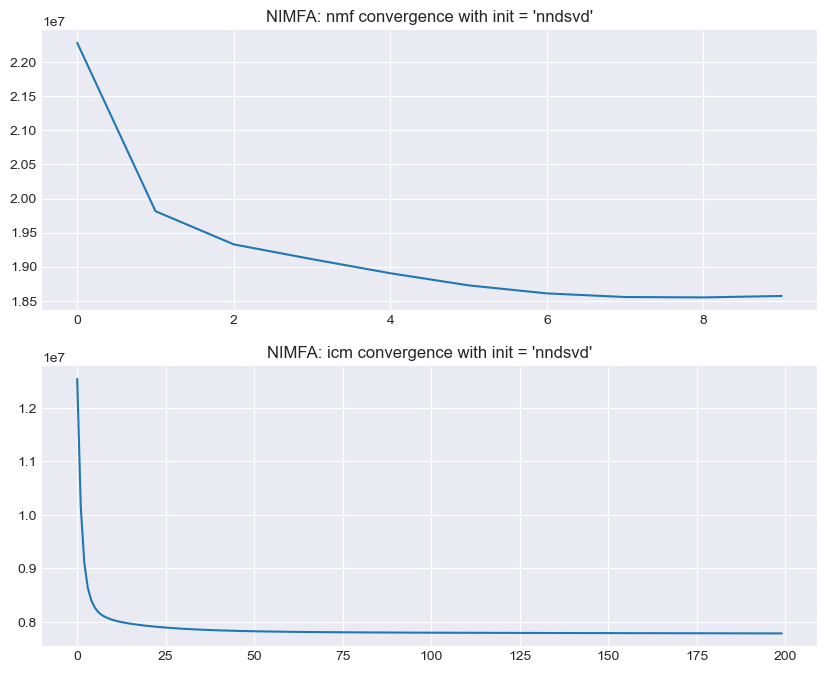

In [93]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.title("NIMFA: nmf convergence with init = 'nndsvd'")
plt.plot(nmf_fit_vol.fit.tracker.get_error())


plt.subplot(2, 1, 2)
plt.title("NIMFA: icm convergence with init = 'nndsvd'")
plt.plot(icm_fit_vol.fit.tracker.get_error())